In [3]:
# prompt: unzip the archive.zip file

!unzip PharmDrug.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/Image_28.jpg      
  inflating: train/Image_280.jpg     
  inflating: train/Image_2800.jpg    
  inflating: train/Image_2801.jpg    
  inflating: train/Image_2802.jpg    
  inflating: train/Image_2803.jpg    
  inflating: train/Image_2804.jpg    
  inflating: train/Image_2805.jpg    
  inflating: train/Image_2806.jpg    
  inflating: train/Image_2807.jpg    
  inflating: train/Image_2808.jpg    
  inflating: train/Image_2809.jpg    
  inflating: train/Image_281.jpg     
  inflating: train/Image_2810.jpg    
  inflating: train/Image_2811.jpg    
  inflating: train/Image_2812.jpg    
  inflating: train/Image_2813.jpg    
  inflating: train/Image_2814.jpg    
  inflating: train/Image_2815.jpg    
  inflating: train/Image_2816.jpg    
  inflating: train/Image_2817.jpg    
  inflating: train/Image_2818.jpg    
  inflating: train/Image_2819.jpg    
  inflating: train/Image_282.jpg     
  inflating: train/Image_2820.jpg    

In [4]:
# prompt: view the top 5 rows of the training_set.csv and testing_set.csv

import pandas as pd

# Load the training set
try:
  train_df = pd.read_csv('Training_set.csv')
  print("Training Set (Top 5 rows):")
  print(train_df.head())
except FileNotFoundError:
  print("Error: Training_set.csv not found.")

# Load the testing set
try:
  test_df = pd.read_csv('Testing_set.csv')
  print("\nTesting Set (Top 5 rows):")
  print(test_df.head())
except FileNotFoundError:
  print("Error: Testing_set.csv not found.")

Training Set (Top 5 rows):
      filename     label
0  Image_1.jpg    Bioflu
1  Image_2.jpg  Bactidol
2  Image_3.jpg  Fish Oil
3  Image_4.jpg  Fish Oil
4  Image_5.jpg    Bioflu

Testing Set (Top 5 rows):
      filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg


In [5]:
# prompt: Preprocess the train folder of images and correlate it to the Training_set.csv file and save into a train_df

import pandas as pd
import os
from PIL import Image
import numpy as np

# Load the training set
try:
  train_df = pd.read_csv('Training_set.csv')
except FileNotFoundError:
  print("Error: Training_set.csv not found.")
  #Handle the error appropriately, e.g., exit or create a default dataframe
  exit()

# Preprocess images and correlate with train_df
image_dir = 'train'  # Assuming images are in a folder named 'train'
image_data = []

if not os.path.exists(image_dir):
  print(f"Error: Directory '{image_dir}' not found.")
  exit()

for index, row in train_df.iterrows():
    image_path = os.path.join(image_dir, row['filename'])

    try:
        img = Image.open(image_path)
        # Resize images (adjust size as needed)
        img = img.resize((64, 64))
        img_array = np.array(img)

        # Add more preprocessing steps if necessary (e.g., normalization, etc.)
        # Example: Normalize pixel values to the range [0, 1]
        # img_array = img_array / 255.0

        image_data.append(img_array)
    except FileNotFoundError:
        print(f"Error: Image file not found - {image_path}")
        #Handle the missing image appropriately, e.g., skip, fill with a default value, etc.
        image_data.append(np.zeros((64, 64, 3))) # Placeholder for missing image

train_df['image_data'] = image_data

print("Training Set with Image Data (First 5 rows):")
print(train_df.head())

Training Set with Image Data (First 5 rows):
      filename     label                                         image_data
0  Image_1.jpg    Bioflu  [[[165, 140, 110], [164, 139, 109], [161, 136,...
1  Image_2.jpg  Bactidol  [[[184, 187, 202], [187, 190, 205], [194, 197,...
2  Image_3.jpg  Fish Oil  [[[191, 187, 184], [190, 186, 183], [186, 182,...
3  Image_4.jpg  Fish Oil  [[[216, 196, 185], [216, 196, 185], [216, 196,...
4  Image_5.jpg    Bioflu  [[[54, 73, 90], [53, 72, 89], [58, 77, 94], [5...


In [ ]:
# prompt: train the images from the train folder to associate the name in the Training_set.csv and save the model as a Keras file

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Assuming train_df is already loaded and preprocessed as in the previous code

# Prepare data for training
X_train = np.array(train_df['image_data'].tolist())
y_train = train_df['label'] # Assuming 'label' is the column with the names

# Convert labels to numerical format (one-hot encoding)
y_train = pd.Categorical(y_train).codes  # Convert labels to numerical format

# Convert to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10) # Adjust epochs as needed

# Save the model
model.save('image_classification_model.keras')
print('Model saved as image_classification_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 43s 186ms/step - accuracy: 0.0982 - loss: 11.1520
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 190ms/step - accuracy: 0.1013 - loss: 2.3029
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 42s 193ms/step - accuracy: 0.0923 - loss: 2.2990
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 80s 184ms/step - accuracy: 0.1041 - loss: 2.2924
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.1102 - loss: 2.2817
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 46s 209ms/step - accuracy: 0.1106 - loss: 2.2838
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 78s 192ms/step - accuracy: 0.1162 - loss: 2.2674
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 80s 181ms/step - accuracy: 0.1268 - loss: 2.2604
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - accuracy: 0.1187 - loss: 2.2531
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 181ms/step - accuracy: 0.1214 - loss: 2.2503
Model saved as image_classification_model.keras


In [6]:
# prompt: can we improve the accuracy of the model using an image transformer

import pandas as pd
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0 # Example: Using EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# ... (Previous code remains the same) ...


# Prepare data for training
X_train = np.array(train_df['image_data'].tolist())
y_train = train_df['label']

# Convert labels to numerical format (one-hot encoding)
y_train = pd.Categorical(y_train).codes
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

# Use a pre-trained image transformer model (EfficientNetB0)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model layers
base_model.trainable = False  # Important: Freeze the base model layers

# Create a new model on top
model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Add a global average pooling layer
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model (adjust epochs as needed)
model.fit(X_train, y_train, epochs=10)


# Fine-tuning (optional): Unfreeze some layers of the base model and retrain
#base_model.trainable = True
#for layer in base_model.layers[:100]: # Example: unfreeze the last 100 layers
#    layer.trainable = False
#model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), # Use a lower learning rate for fine-tuning
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=5) # Train for a few more epochs


# Save the model
model.save('image_classification_model_with_transformer.keras')
print('Model saved as image_classification_model_with_transformer.keras')

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 55s 194ms/step - accuracy: 0.2340 - loss: 2.0920
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 42s 189ms/step - accuracy: 0.4385 - loss: 1.5925
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 190ms/step - accuracy: 0.5123 - loss: 1.4128
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 43s 196ms/step - accuracy: 0.5792 - loss: 1.2489
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 48s 220ms/step - accuracy: 0.6047 - loss: 1.1537
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 77s 199ms/step - accuracy: 0.6325 - loss: 1.0869
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 84s 211ms/step - accuracy: 0.6757 - loss: 0.9631
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 44s 200ms/step - accuracy: 0.6875 - loss: 0.9383
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 81s 195ms/step - accuracy: 0.7197 - loss: 0.8507
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 82s 196ms/step - accuracy: 0.7320 - loss: 0.8057
Model saved as image_classification_model_with_transformer

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


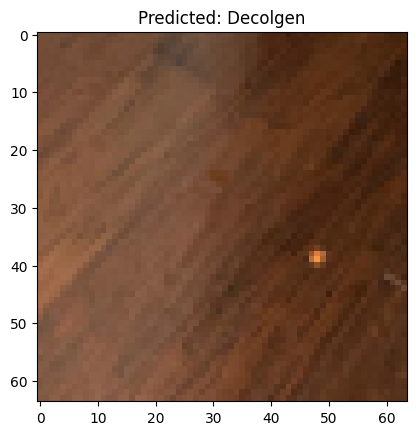

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


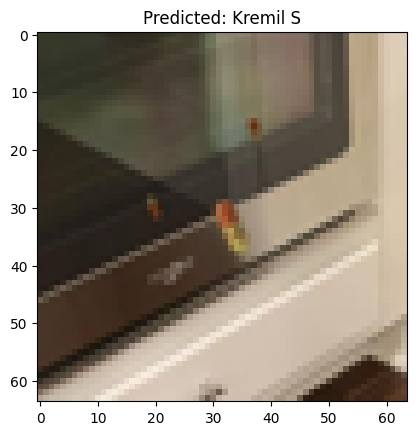

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


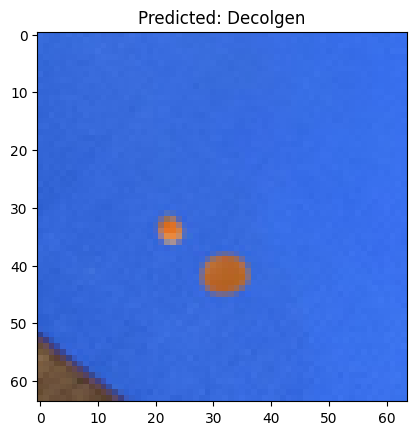

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


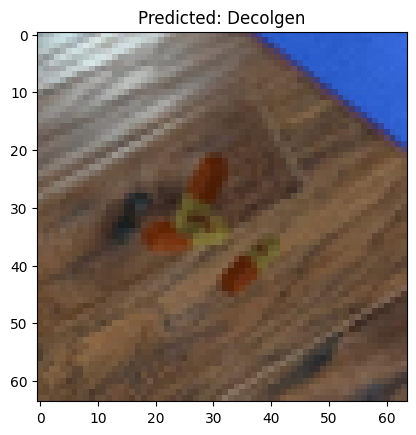

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


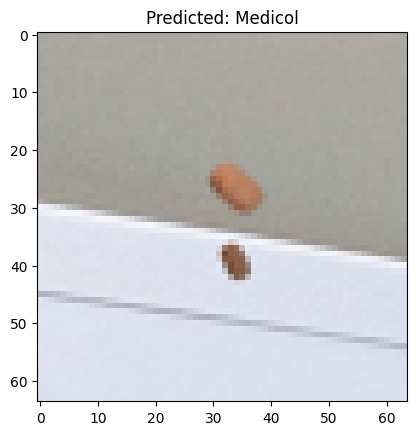

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


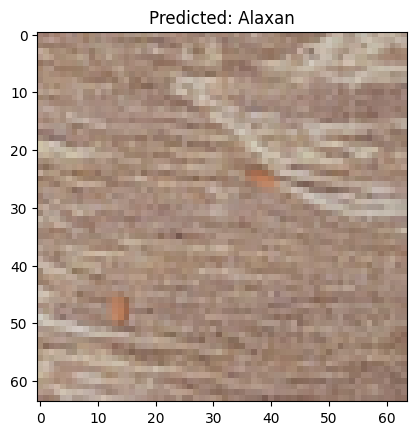

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


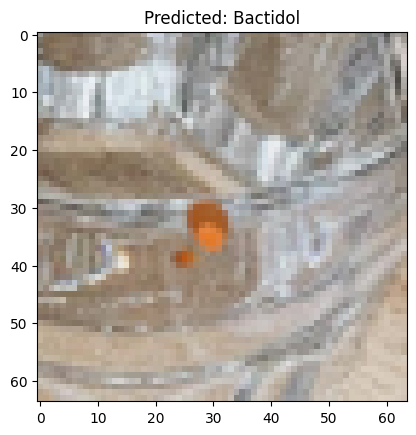

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


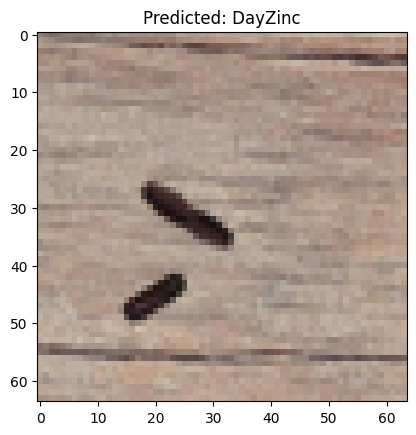

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


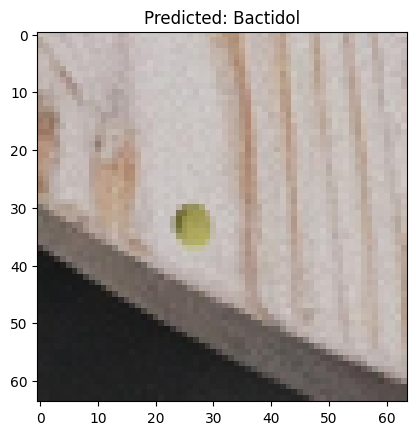

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


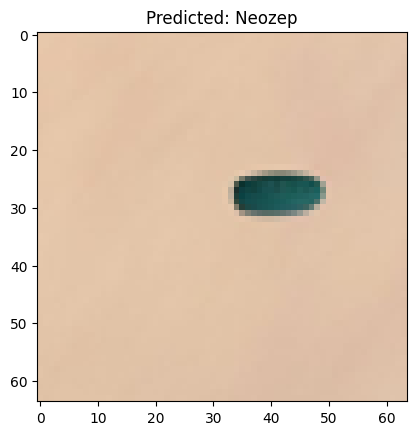

In [8]:
# prompt: using the test folder, test 10 images with the model and show the prediction of those images. show the images tested and predicted label name

import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the saved model
model = keras.models.load_model('image_classification_model_with_transformer.keras')

# Define the test directory
test_dir = 'test'  # Assuming the test images are in the 'test' directory

# Get the list of image files in the test directory
image_files = [f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))]

# Limit to the first 10 images for demonstration
image_files = image_files[:10]

# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).resize((64, 64))
    img_array = np.array(img)
    return img_array

# Function to predict the class of a single image
def predict_image_class(img_array):
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    return predicted_class_index

# Create a mapping of numerical labels to original class names
label_mapping = {i: label for i, label in enumerate(np.unique(train_df['label']))}

# Iterate through the images and make predictions
for image_file in image_files:
    image_path = os.path.join(test_dir, image_file)
    try:
        img_array = preprocess_image(image_path)
        predicted_class_index = predict_image_class(img_array)
        predicted_label = label_mapping.get(predicted_class_index)

        # Display the image and prediction
        plt.imshow(img_array)
        plt.title(f"Predicted: {predicted_label}")
        plt.show()

    except Exception as e:
        print(f"Error processing {image_file}: {e}")

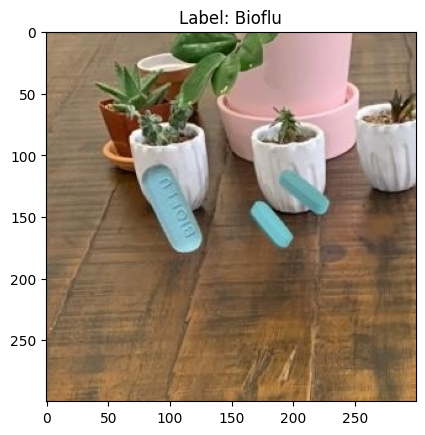

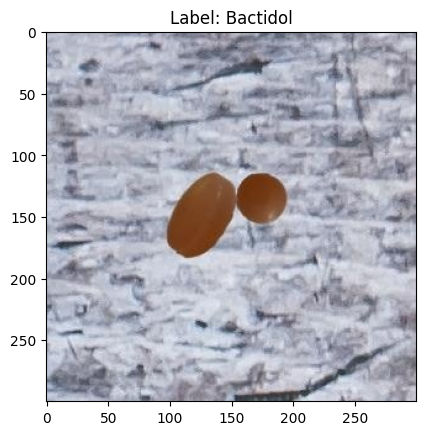

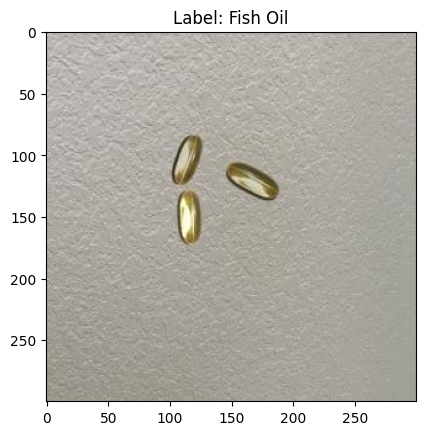

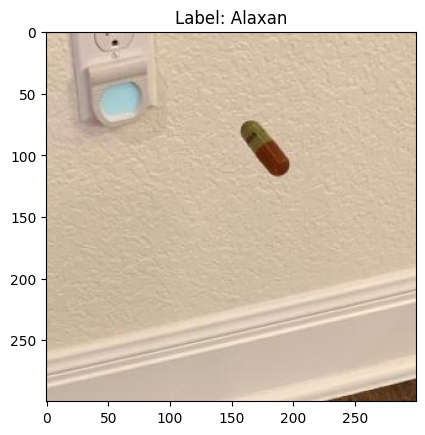

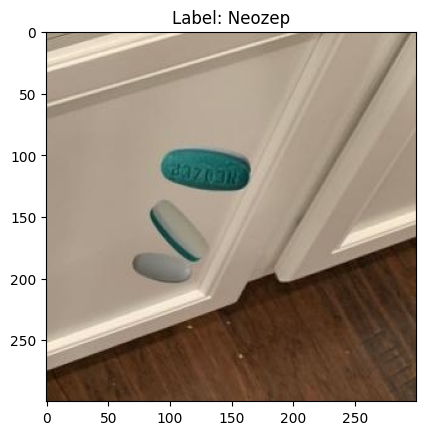

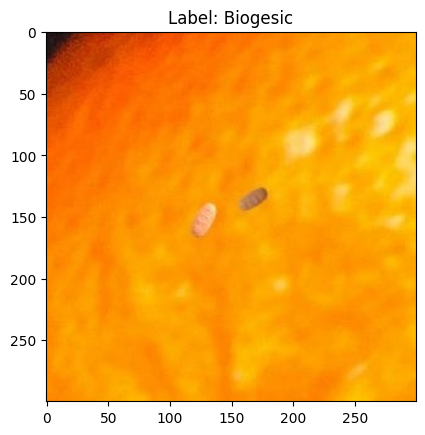

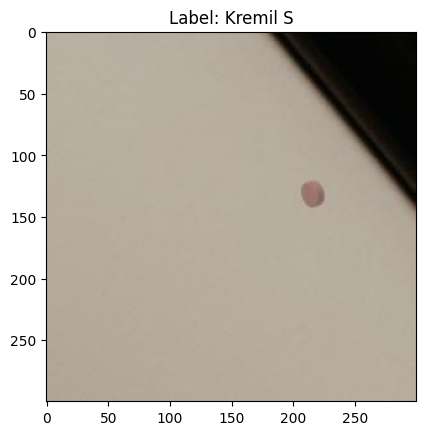

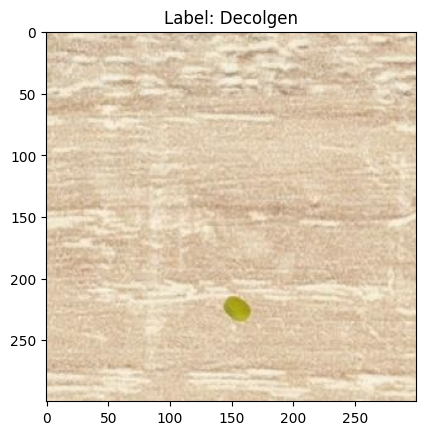

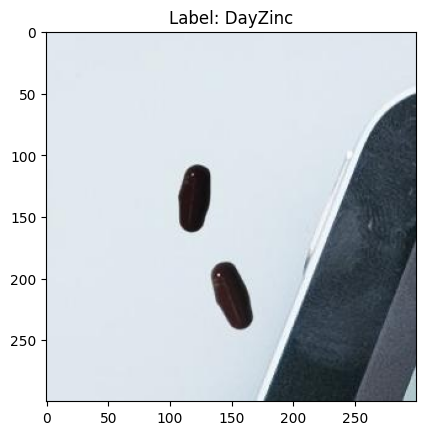

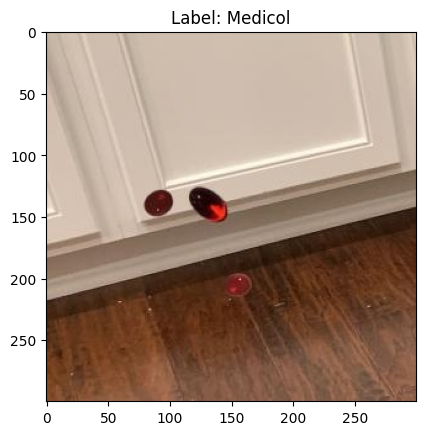

In [12]:
# prompt: show the list of labels from the training csv then using the list of labels provide an image of each

import matplotlib.pyplot as plt

# Assuming 'train_df' and 'image_dir' are defined as in the previous code

# Get the unique labels
unique_labels = train_df['label'].unique()

# Display one image for each label
for label in unique_labels:
    # Find a file with the current label
    image_filename = train_df[train_df['label'] == label]['filename'].iloc[0]
    image_path = os.path.join(image_dir, image_filename)

    try:
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image file not found for label '{label}' - {image_path}")
    except Exception as e:
        print(f"Error displaying image for label '{label}': {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


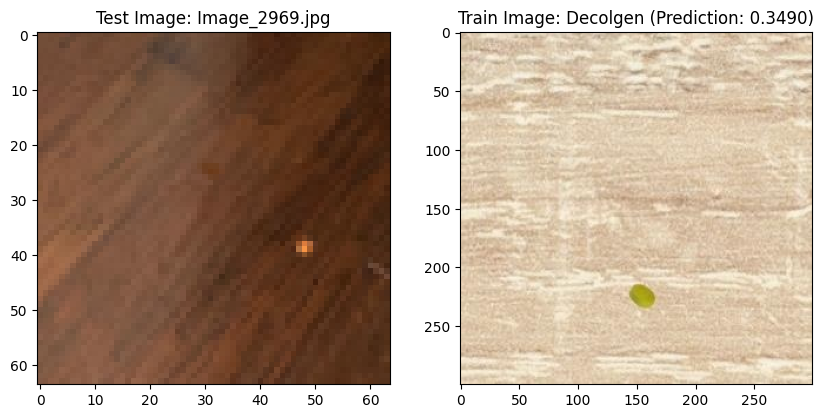

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


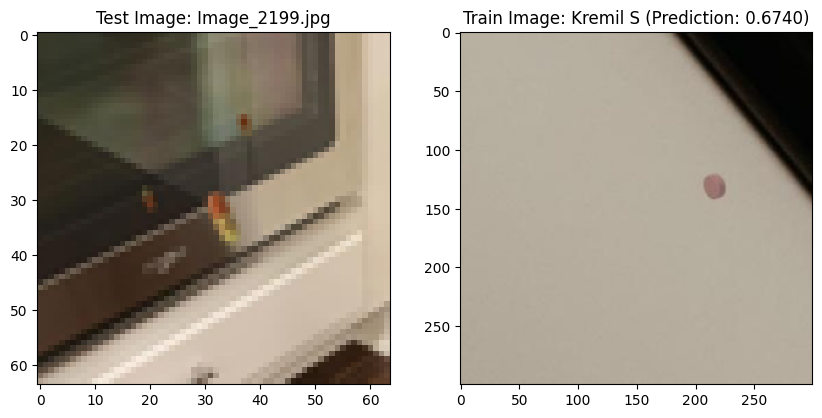

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


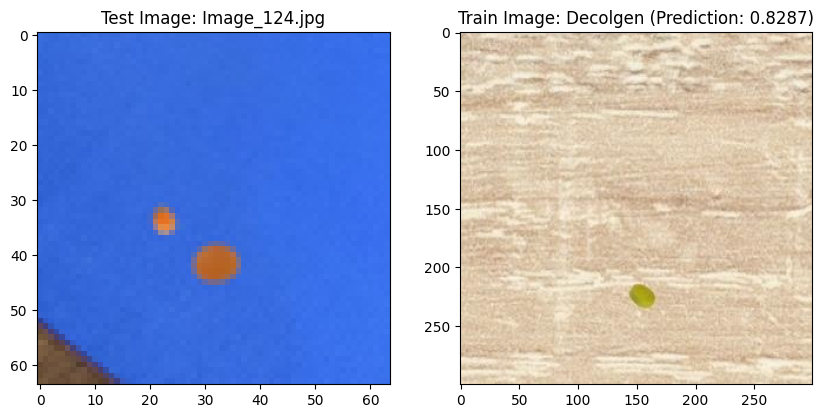

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


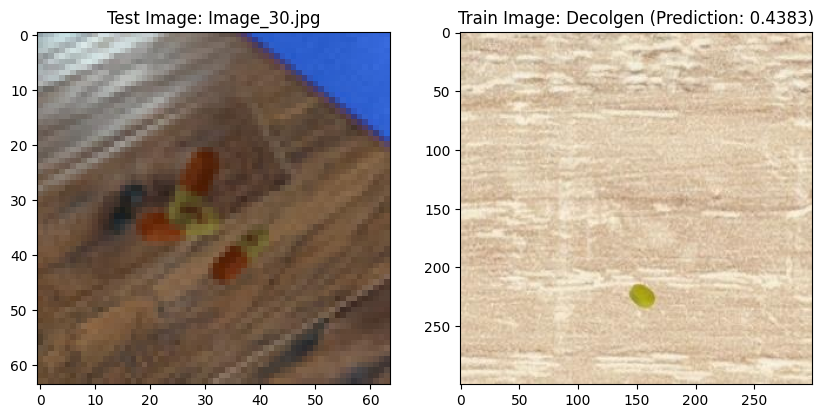

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


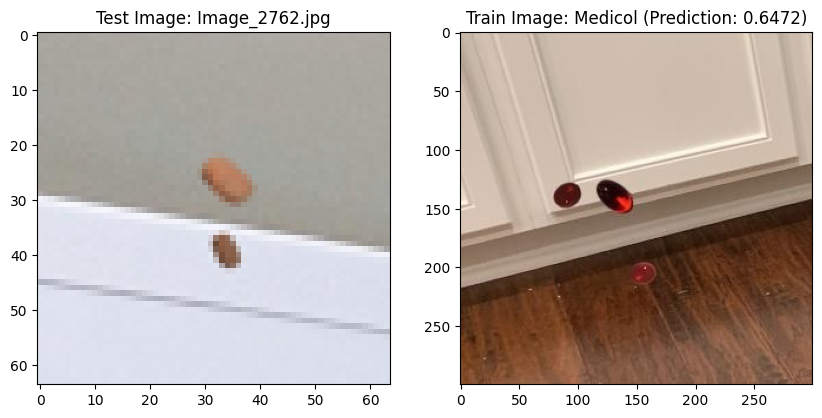

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


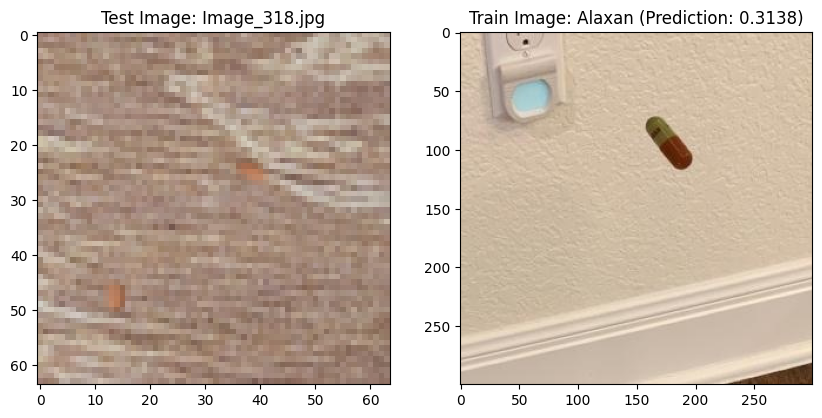

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


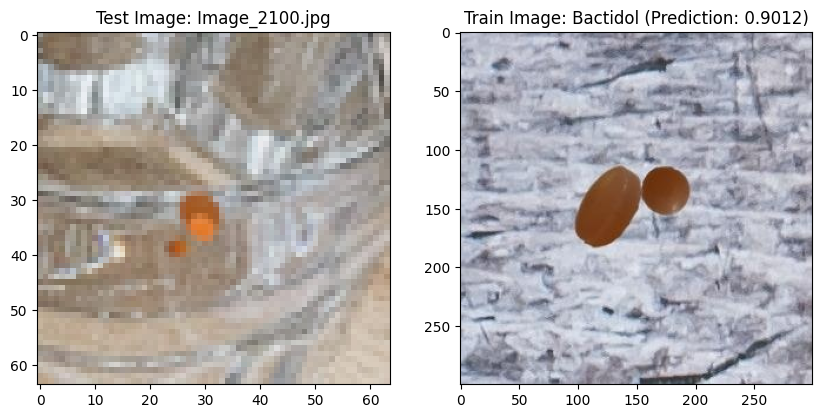

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


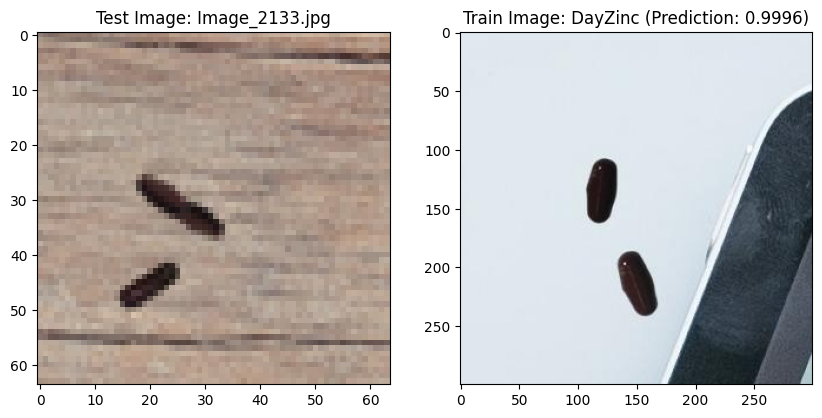

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


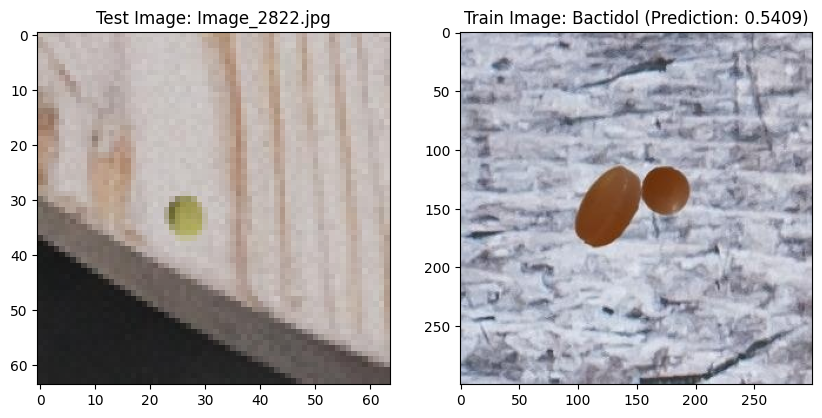

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


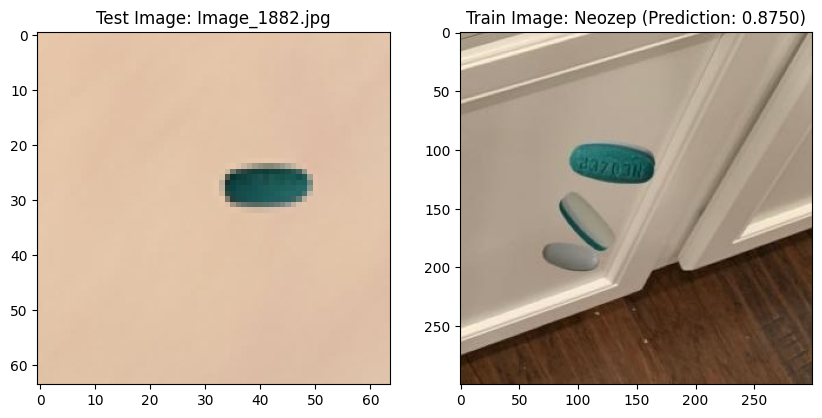

In [14]:
# prompt: using the test folder, test 10 images with the model and show the prediction of those images. show the images tested and predicted label name and prediction value. place the trained image next to the test image

# ... (Previous code remains the same) ...

# Load the saved model
model = keras.models.load_model('image_classification_model_with_transformer.keras')

# Define the test directory
test_dir = 'test'  # Assuming the test images are in the 'test' directory

# Get the list of image files in the test directory
image_files = [f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))]

# Limit to the first 10 images for demonstration
image_files = image_files[:10]

# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).resize((64, 64))
    img_array = np.array(img)
    return img_array

# Function to predict the class of a single image
def predict_image_class(img_array):
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    prediction_value = prediction[0][predicted_class_index] # Get prediction probability
    return predicted_class_index, prediction_value

# Create a mapping of numerical labels to original class names
label_mapping = {i: label for i, label in enumerate(np.unique(train_df['label']))}

# Iterate through the images and make predictions
for image_file in image_files:
    image_path = os.path.join(test_dir, image_file)
    try:
        img_array = preprocess_image(image_path)
        predicted_class_index, prediction_value = predict_image_class(img_array)
        predicted_label = label_mapping.get(predicted_class_index)

        # Display the image and prediction side-by-side
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with two subplots

        # Display test image
        axes[0].imshow(img_array)
        axes[0].set_title(f"Test Image: {image_file}")

        # Find and display training image with the same label
        try:
          example_image_filename = train_df[train_df['label'] == predicted_label]['filename'].iloc[0]
          example_image_path = os.path.join(image_dir, example_image_filename)
          example_img = Image.open(example_image_path)
          axes[1].imshow(example_img)
          axes[1].set_title(f"Train Image: {predicted_label} (Prediction: {prediction_value:.4f})")

        except (IndexError, FileNotFoundError):
            axes[1].imshow(np.zeros((64, 64, 3), dtype=np.uint8)) #Placeholder for missing image
            axes[1].set_title(f"Train Image: No Image Available (Prediction: {prediction_value:.4f})")
        plt.show()
    except Exception as e:
        print(f"Error processing {image_file}: {e}")